Project Title: Customer Churn Analysis & Prediction for a Telecom Company

Background:
Customer churn is the period where customers stop using a company’s products or services. Predicting churn is critical for businesses because it is often more expensive and hard to get new customers than retaining existing ones. By identifying customers at risk of leaving, companies can take proactive measures such as targeted promotions, personalized offers, or improved service—to improve retention and maximize revenue.

Goal of Analysis:
The goal of this analysis is to predict which customers are likely to churn based on billing, service, and demographic features. By implementing machine learning models such as Logistic regression and Random forest, we aim to identify key factors influencing churn and provide actionable insights to reduce customer churning.

The dataset is obtained from Kaggle: https://www.kaggle.com/blastchar/telco-customer-churn

Features include:

1. Customer demographics (gender, age, etc.)

2. Account details (contract type, tenure, billing method)

3. Service usage (internet service, streaming, phone lines)

4. Target variable: Churn (Yes/No)

Step1:  Loading the necessary libraries

In [1]:
#Loading necessary libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report



2. Loading the dataset

In [2]:
#Loading the csv file
data= pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [3]:
#Viewing the first 5 rows
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
data.tail(40)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7003,4501-VCPFK,Male,0,No,No,26,No,No phone service,DSL,No,...,Yes,Yes,No,No,Month-to-month,No,Electronic check,35.75,1022.5,No
7004,6075-SLNIL,Male,0,No,No,38,Yes,Yes,Fiber optic,No,...,Yes,No,No,Yes,Month-to-month,Yes,Credit card (automatic),95.10,3691.2,No
7005,9347-AERRL,Male,0,Yes,No,23,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Credit card (automatic),19.30,486.2,No
7006,0093-XWZFY,Male,0,No,No,40,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),104.50,4036.85,Yes
7007,2274-XUATA,Male,1,Yes,No,72,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),63.10,4685.55,No
7008,1980-KXVPM,Female,1,No,No,3,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),75.05,256.25,Yes
7009,7703-ZEKEF,Male,0,No,No,23,Yes,Yes,Fiber optic,No,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,81.00,1917.1,Yes
7010,0723-DRCLG,Female,1,Yes,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,74.45,74.45,Yes
7011,5482-NUPNA,Female,0,No,No,4,Yes,No,DSL,Yes,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,60.40,272.15,Yes
7012,6691-CCIHA,Female,0,Yes,No,62,Yes,Yes,DSL,Yes,...,No,Yes,Yes,Yes,Two year,Yes,Electronic check,84.95,5150.55,No


2. Inspection of the data
-Accessing the data for any errors, inconsistencies and patterns

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In the dataset, where tenure is O, there's blank spaces in TotalCharges which makes the TotalCharges column to be reported as object. The column TotalCharges should be converted to float by replacing blank spaces with "0".

In [6]:
data['TotalCharges']= data['TotalCharges'].replace(" ", "0")
data['TotalCharges']=data['TotalCharges'].astype(float)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


3. Checking for missing data

In [7]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

4. Checking for duplicated data

In [8]:
data.duplicated().sum()

0

5.1  Descriptive Summary of numerical features

In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


6. DATA VISUALIZATION

6.1 How many people churn out from the company

Text(0.5, 1.0, 'Count of Churn customers and Non-churn customer')

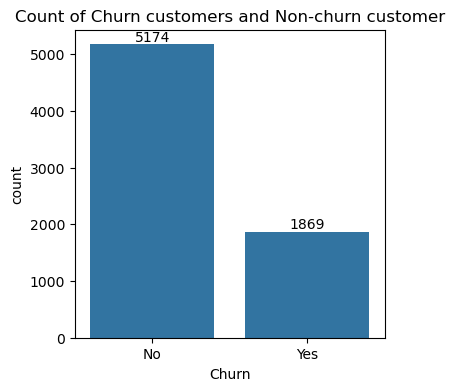

In [10]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Churn', data=data)
ax.bar_label(ax.containers[0])
plt.title('Count of Churn customers and Non-churn customer')

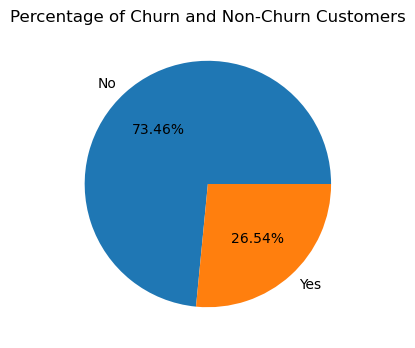

In [11]:
plt.figure(figsize=(4,4))
bb= data.groupby('Churn').agg({'Churn': 'count'})
plt.pie(bb['Churn'], labels=bb.index, autopct="%1.2f%%")
plt.title('Percentage of Churn and Non-Churn Customers')
plt.show()

From the above observation, there's 26.54% of churn customers(customers who leave the company), so now we need to explore the reason behind this.

6.2 How many females and males leave the company?

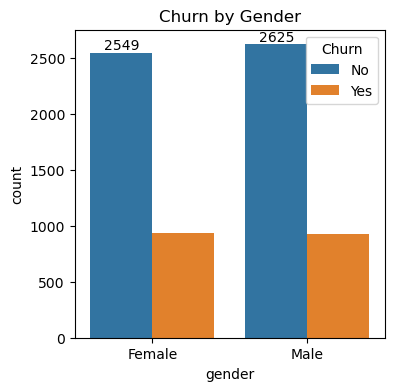

In [12]:
plt.figure(figsize=(4,4))
ax=sns.countplot(x='gender', data=data, hue='Churn')
ax.bar_label(ax.containers[0])
plt.title('Churn by Gender')
plt.show()

6.3 Are senior or non-senior citizens more likely to churn?

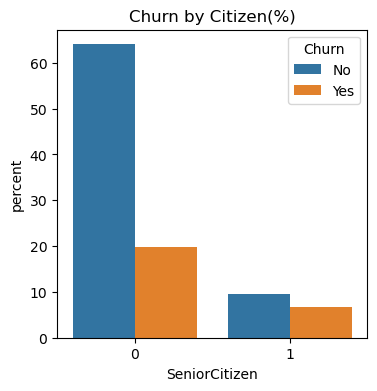

In [13]:
plt.figure(figsize=(4,4))
sns.countplot(x='SeniorCitizen', data=data, hue='Churn', stat='percent')
plt.title('Churn by Citizen(%)')
plt.show()

For SeniorCitizen, "0" means No and "1" means Yes.
I want to keep this feature classification like this  for downstream analysis.

From the observation above, Non-senior citizens are more likely to churn.

6.4 How does the number of months a customer has stayed with the company influence their chances of churning?

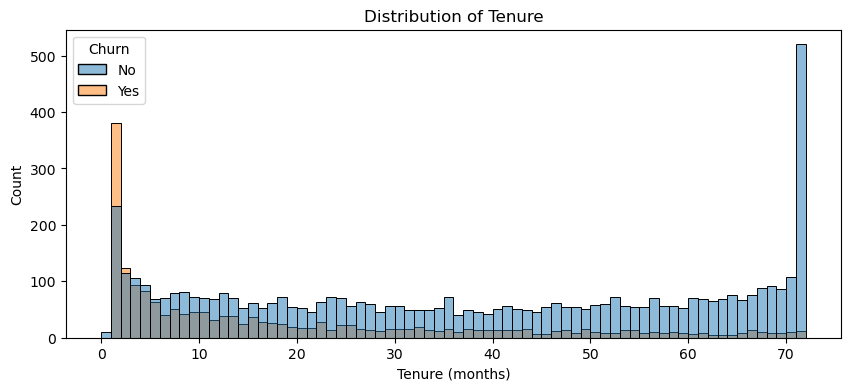

In [14]:
plt.figure(figsize=(10,4))
sns.histplot(x='tenure', data=data, bins=72, hue='Churn')
plt.title('Distribution of Tenure')
plt.xlabel('Tenure (months)')
plt.show()

From the above observation, the customers who have been with the company for a very long time have stayed and the customers who have been with the company for a month or two have churned.

6.5 Which contract type has the high number of customer churn?

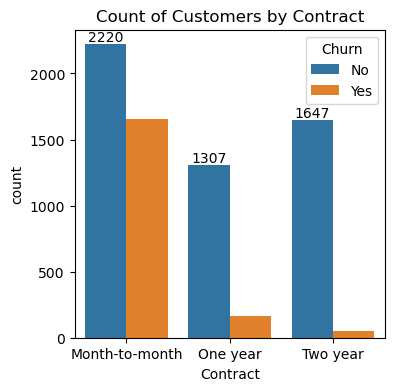

In [15]:
plt.figure(figsize=(4,4))
ax= sns.countplot(x='Contract', hue='Churn', data=data)
ax.bar_label(ax.containers[0]) #To add count labels on bars
plt.title('Count of Customers by Contract')
plt.show()

From the above observation, Customers with Month-to-Month contract are most likely to churn.

In [16]:
#Listing all columns
data.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

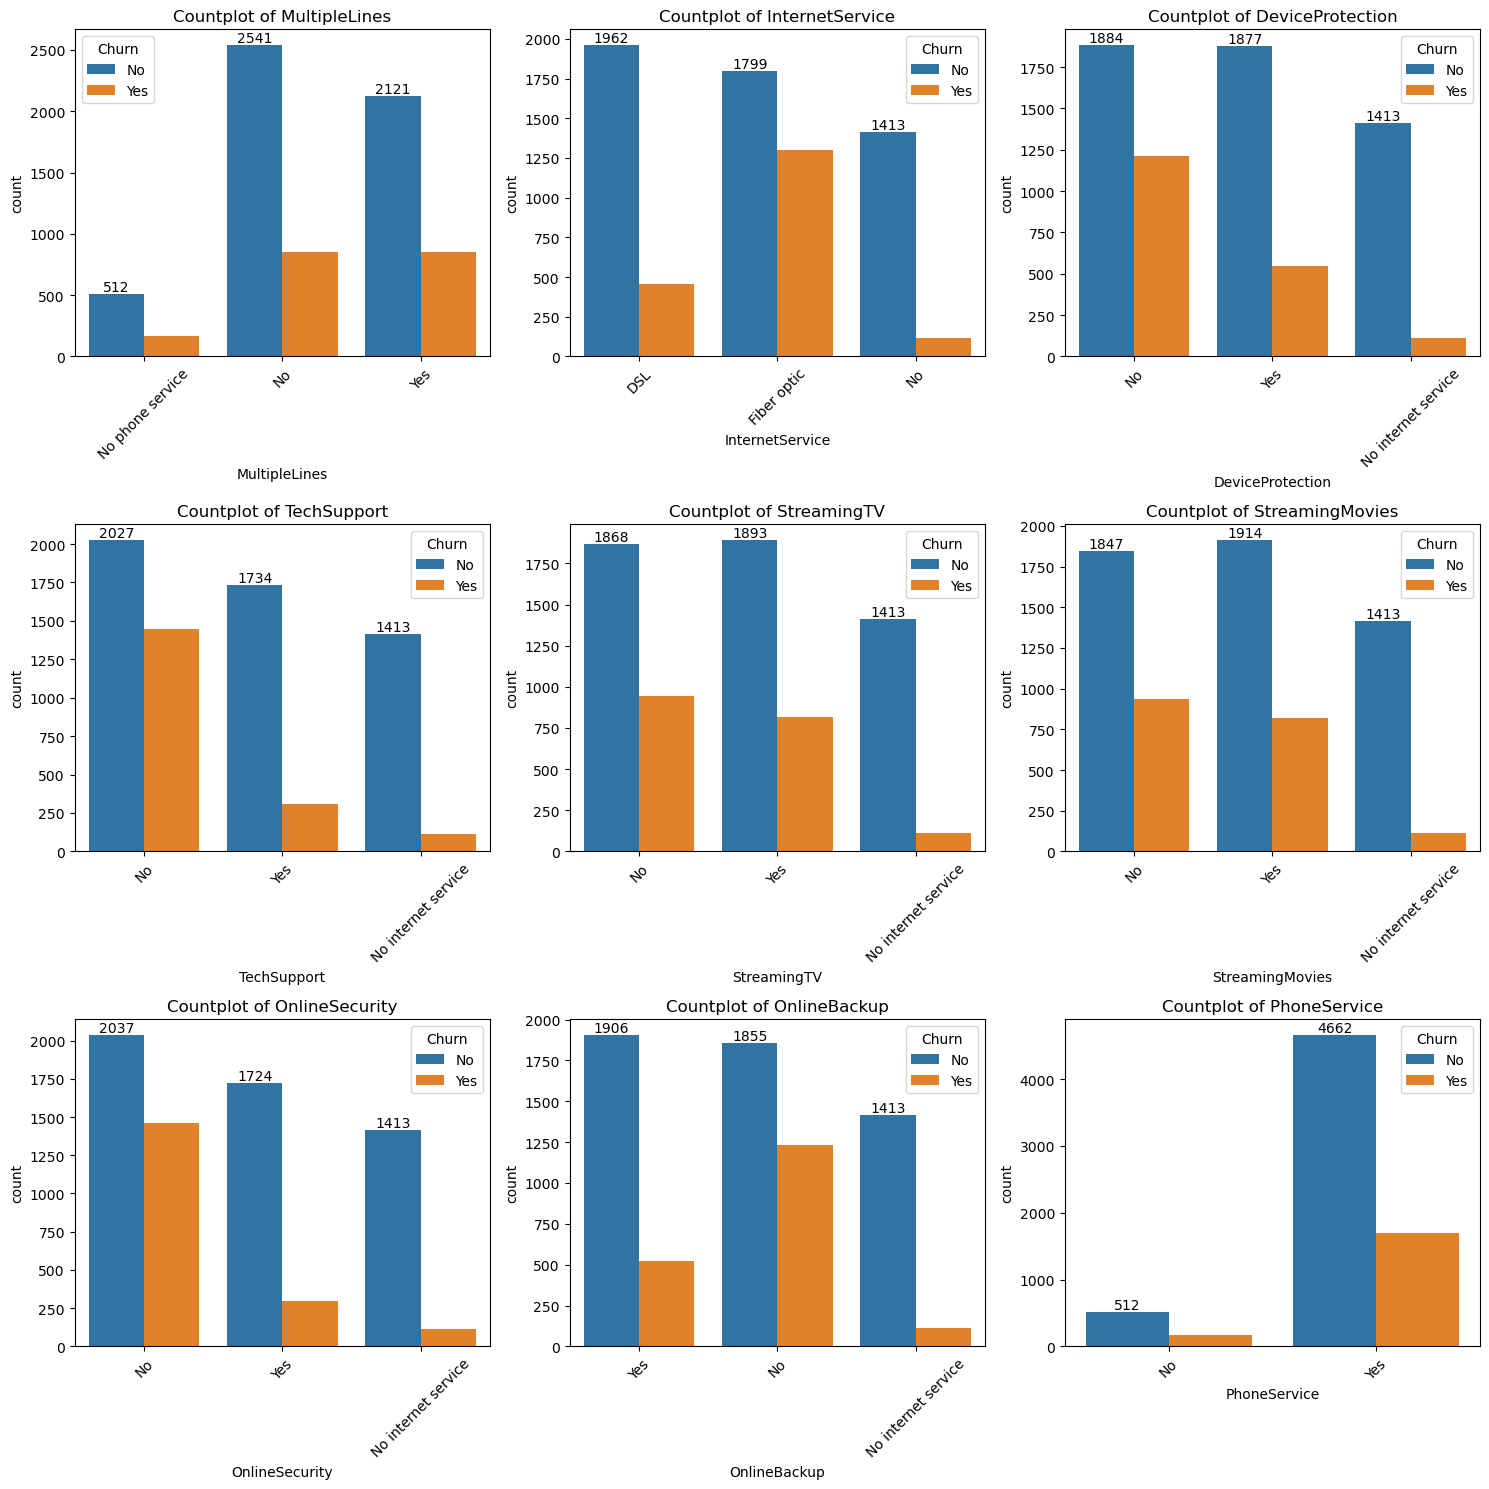

In [17]:
#Listing columns to plot
cols= ['MultipleLines', 'InternetService', 'DeviceProtection','TechSupport', 'StreamingTV', 'StreamingMovies', 'OnlineSecurity','OnlineBackup', 'PhoneService']

#Setup subplots
fig, axes=plt.subplots(nrows=3, ncols=3, figsize=(15,15))
axes= axes.flatten()  #Convert 2D to 1D for easy looping

#Looping through the columns and rows
for i, col in enumerate(cols):
    sns.countplot(x=col, data=data, hue='Churn', ax=axes[i])
    axes[i].set_title(f'Countplot of {col}')
    axes[i].tick_params(axis='x', rotation=45)
    axes[i].bar_label(axes[i].containers[0]) #To add count labels on bars

plt.tight_layout()
plt.show()
    


From the above observation, the customers that use Fiber optic as their internet Service are more likely to churn than those using DSL. Customers that do not have services such as DeviceProtection, TechSupport, StreamingTV, StreamingMovies, OnlineBackup and OnlineSecurity are more likely to churn than those that have the services. Customers with PhoneServices are more likely to churn compared to those that do have the services. Overall, these features influence the churning of customers significantly.

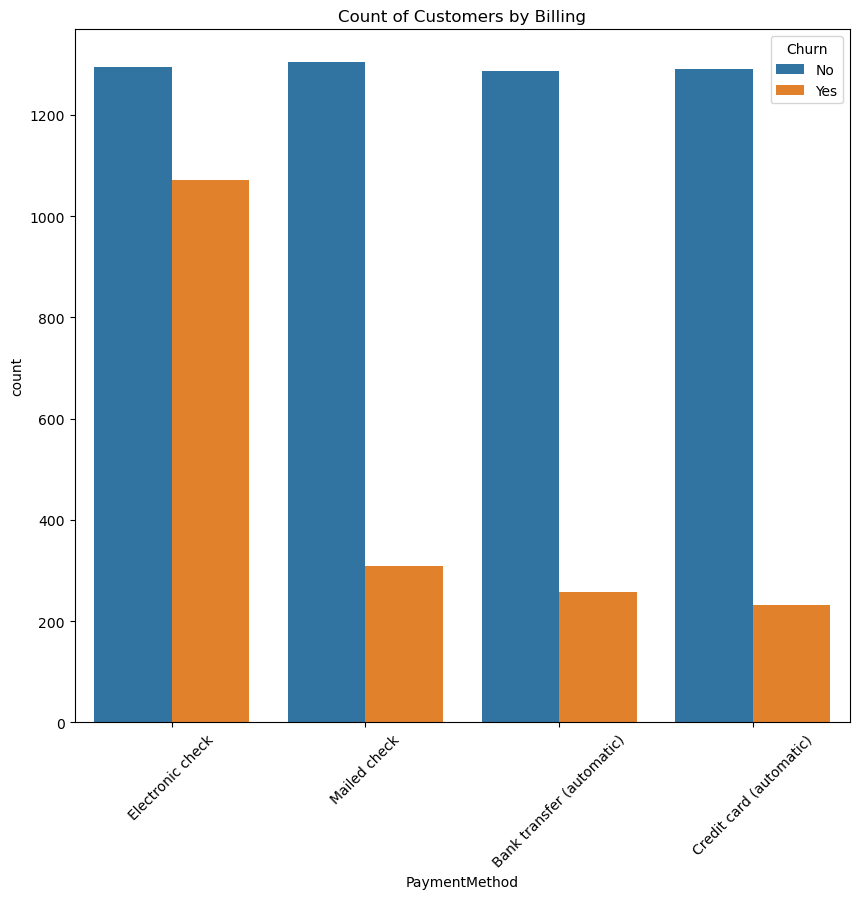

In [18]:
plt.figure(figsize=(10,9))
ax=sns.countplot(x='PaymentMethod', data=data, hue='Churn')
plt.xticks(rotation=45)
plt.title('Count of Customers by Billing')
plt.show()

# Add labels to each bar
for container in ax.containers:
    ax.bar_label(container, label_type='edge')  # You can use 'center' or 'edge'


From the above observation, customers that use electronic check as the payment method are most like to churn.

PREPARING FOR MODELLING

In [19]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [20]:
#Dropping unnecesary columns/features
data=data.drop(['customerID'], axis=1)    

In [21]:
#Converting the target column from categorical to numerical feature
Label_encode1= LabelEncoder()
data['Churn']=Label_encode1.fit_transform(data['Churn'])

In [22]:
data['Churn'].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [23]:
data.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [24]:
#Identifying object columns
object_columns= data.select_dtypes(include='object').columns

In [25]:
print(object_columns)

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')


Converting categorical features to numerical features for modelling

In [26]:
for column in object_columns:
    Label_encoder= LabelEncoder()
    data[column]= Label_encoder.fit_transform(data[column])

In [27]:
data.head(10)

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,0,2,0,2,2,0,1,2,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,2,0,0,2,0,0,1,1,89.10,1949.40,0
7,0,0,0,0,10,0,1,0,2,0,0,0,0,0,0,0,3,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,0,2,2,2,2,0,1,2,104.80,3046.05,1
9,1,0,0,1,62,1,0,0,2,2,0,0,0,0,1,0,0,56.15,3487.95,0


FEATURE SELECTION

In [28]:
x= data.drop(columns='Churn') #Selecting all columns except the target
y= data['Churn']

Splitting the train and test dataset

In [29]:
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size=0.2, random_state=42)

FEATURE SCALING

In [30]:
#Feature scaling (to ensure that all the features are within the same scale
scaler= StandardScaler()
x_train= scaler.fit_transform(x_train)
x_test= scaler.transform(x_test)

In [31]:
#Display the scaled data
print(x_train[:5], x_test[:5])

[[-1.02516569e+00 -4.37749204e-01 -9.69578591e-01  1.53218588e+00
  -4.65683364e-01  3.29573443e-01 -1.00053704e+00 -1.18234670e+00
   1.41087932e+00 -1.03835668e+00  1.24865826e+00 -9.21483507e-01
  -1.11746144e+00  1.13423428e+00  3.72908354e-01 -1.20000722e+00
   1.33926673e+00 -4.73723375e-04 -4.19924521e-01]
 [-1.02516569e+00 -4.37749204e-01 -9.69578591e-01 -6.52662324e-01
   8.85536787e-01  3.29573443e-01  1.10833901e+00  1.74618326e-01
  -9.15399313e-01  1.23000375e+00 -1.02360939e+00 -9.21483507e-01
   1.14070848e+00  1.13423428e+00  1.57759050e+00  8.33328321e-01
  -1.47094882e+00  1.07475386e+00  1.25601669e+00]
 [ 9.75452077e-01 -4.37749204e-01  1.03137591e+00 -6.52662324e-01
  -1.28460467e+00 -3.03422506e+00  5.39009851e-02 -1.18234670e+00
  -9.15399313e-01 -1.03835668e+00 -1.02360939e+00 -9.21483507e-01
  -1.11746144e+00 -1.12381376e+00 -8.31773795e-01  8.33328321e-01
   4.02528212e-01 -1.37649913e+00 -1.00028321e+00]
 [ 9.75452077e-01 -4.37749204e-01 -9.69578591e-01 -6.52

Random Forest Model

In [32]:
#Initialising the random forest model
RF_model= RandomForestClassifier(n_estimators=100, random_state=42)

#Training the model
RF_model.fit(x_train, y_train)

RandomForestClassifier(random_state=42)

In [33]:
#To make predictions
y_pred= RF_model.predict(x_test)

In [34]:
#Confusion matrix comparing actual and predicted labels
RF_conf_matrix= confusion_matrix(y_test,y_pred)

#Classification report displaying precision, recall, support and F1-score
RF_class_repo= classification_report(y_test,y_pred)

#Accuracy score
RF_accuracy_score= accuracy_score(y_test, y_pred)

In [35]:
#Display results
print(RF_conf_matrix)
print(RF_class_repo)
print(f'Random Forest Accuracy score : {RF_accuracy_score}')

[[945  91]
 [197 176]]
              precision    recall  f1-score   support

           0       0.83      0.91      0.87      1036
           1       0.66      0.47      0.55       373

    accuracy                           0.80      1409
   macro avg       0.74      0.69      0.71      1409
weighted avg       0.78      0.80      0.78      1409

Random Forest Accuracy score : 0.7955997161107168


Logistic Regression Model

In [36]:
#importing logistic regression
from sklearn.linear_model import LogisticRegression

#Initialising the Logistic Regression Model
LR_model= LogisticRegression(random_state=42)

#Training the model
LR_model.fit(x_test, y_test)

#Making predictions
LR_y_pred= LR_model.predict(x_test)

In [37]:
#Confusion matrix displaying the actual and predicted labels
LR_conf_matrix= confusion_matrix(y_test,LR_y_pred)

#Classification report displaying the precision, support, recall and f1-score
LR_class_repo= classification_report(y_test, LR_y_pred)

#Accuracy score
LR_accuracy_score= accuracy_score(y_test, LR_y_pred)

In [38]:
# Display results
print(LR_conf_matrix)
print(LR_class_repo)
print(f'Logistic Regression : {LR_accuracy_score}')

[[934 102]
 [156 217]]
              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1036
           1       0.68      0.58      0.63       373

    accuracy                           0.82      1409
   macro avg       0.77      0.74      0.75      1409
weighted avg       0.81      0.82      0.81      1409

Logistic Regression : 0.8168914123491838


ROC Curve (Receiver Operating Characteristic curve)

ROC Curve is used to evaluate the performance of the Logistic regression model.

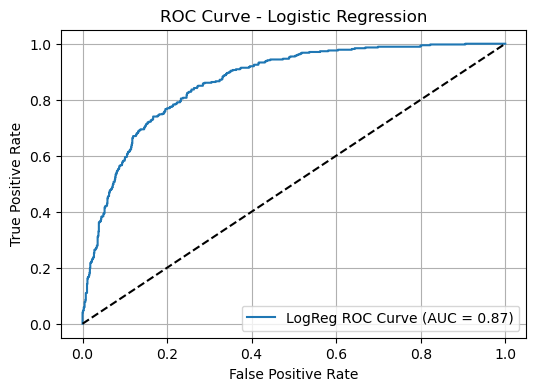

In [39]:
from sklearn.metrics import roc_curve, auc

# Get prediction probabilities for positive class
LR_y_proba = LR_model.predict_proba(x_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(y_test, LR_y_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'LogReg ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal baseline
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

From the above observation, AUC = 0.87 which shows that the logistic regression model has an 87% chance of ranking a random positive instance higher than a random negative one.

FEATURE IMPORTANCE

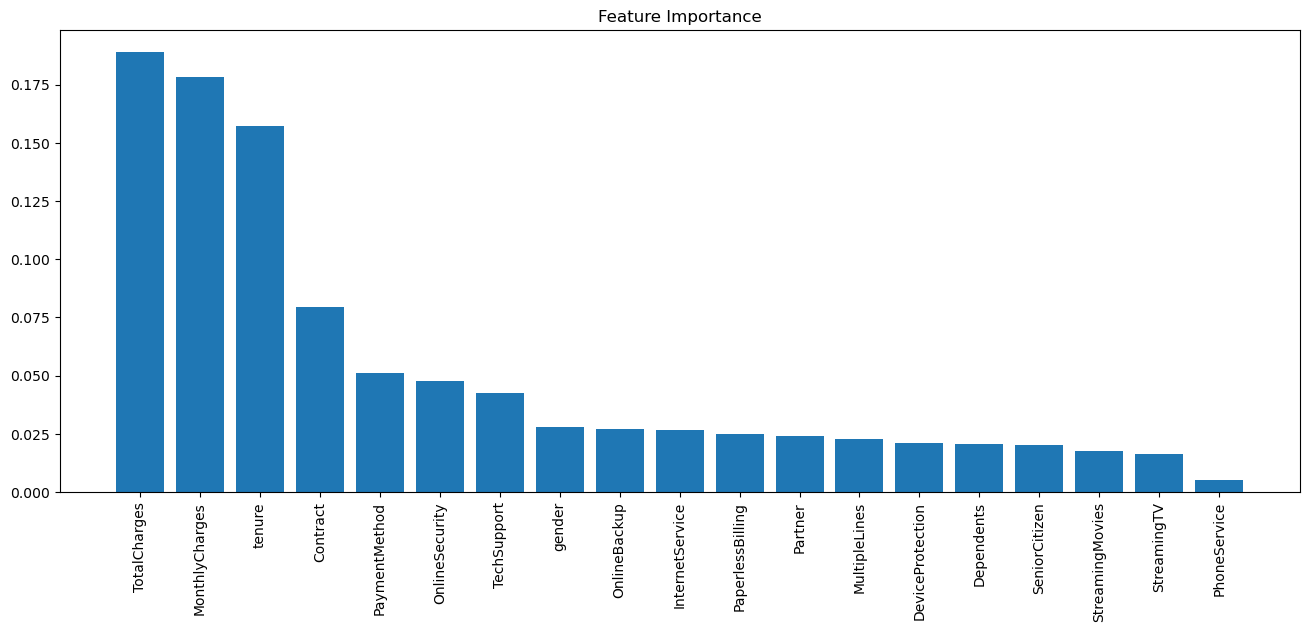

In [40]:
#visualise feature importance
importances = RF_model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [x.columns[i] for i in indices]

plt.figure(figsize=(16, 6))
plt.title("Feature Importance")
plt.bar(range(x_train.shape[1]), importances[indices])
plt.xticks(range(x_train.shape[1]), names, rotation=90)
plt.show()

From the above observation, shows that the Random forest model relies most heavily on billing and customer duration features (TotalCharges, MonthlyCharges, tenure), followed by contract and payment details (Contract, PaymentMethod). Other features such as gender, online services, and paperless billing have moderate influence, while phone and streaming services contribute very little to the predictions.In conclusion, money and contract factors matter most, while add-on services matter least.



Insights:

The billing-related variables (TotalCharges, MonthlyCharges) dominate the predictive power.

Customer relationship features (tenure, Contract, PaymentMethod) also matter a lot.

Add-on services (Streaming, DeviceProtection, etc.) are less critical in the model.

If this is for churn prediction, it indicates that money-related and contract-related factors are the strongest predictors of churn.

⚡️ In short: The model mainly predicts based on how much customers are paying and how long they’ve been around, while service add-ons don’t impact the outcome much.